# 智能语音识别与二维码转换

## 预备知识：用QRcode生成二维码

生成二维码，最好用的库莫过于QRcode了。安装方式如下：

pip install qrcode

## 教程说明

因为是在jupyter上呈现二维码图片，所以要使用matplotlib，并加上“%matplotlib inline”的声明，直接运行则不需要。
```
from matplotlib import pyplot as plt
%matplotlib inline
```
为了让每一个单元格的代码都可以独立运行，下面都增加了这两句话。

## 1.生成简单二维码

就一句代码：qrcode.make(data)。data为文本内容。

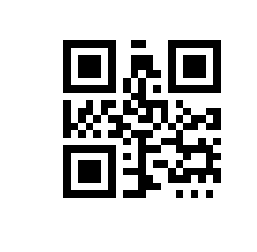

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import qrcode
data='helloworld'
img = qrcode.make(data)
plt.imshow(img)
plt.axis('off') #不显示坐标
plt.show()

如果要生成网址二维码呢？其实只要把data中的文本换成网址就好了。

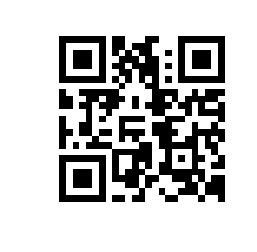

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import qrcode
data = "http://www.vvboard.com.cn"
img = qrcode.make(data)
plt.imshow(img)
plt.axis('off') #不显示坐标
plt.show()

生成图片文件更加简单了，“img.save("qr.jpg")”就搞定了。

In [3]:
# 保存二维码为文件
img.save("qr.jpg")

## 2.生成不一样的二维码

QRcode支持生成不同样式的二维码，通过参数可以设置二维码的大小、颜色等。下面的代码可以生成绿码（这是健康码中的极品啊）。

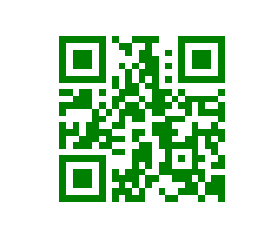

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import qrcode
# 实例化二维码生成类
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
# 设置二维码数据
data = "http://www.vvboard.com.cn"
qr.add_data(data)

# 启用二维码颜色设置
qr.make(fit=True)
img = qr.make_image(fill_color="green", back_color="white")

# 显示二维码
# img.show()
plt.imshow(img)
plt.axis('off') #不显示坐标
plt.show()

代码中参数的意义如下：
    - version参数----二维码的格子矩阵大小，可以是1到40，1最小为2121，40是177177
    - error_correction参数----二维码错误容许率，默认ERROR_CORRECT_M，容许小于15%的错误率
    - box_size参数----二维码每个小格子包含的像素数量
    - border参数----二维码到图片边框的小格子数，默认值为4

请调整一下参数，看看生成的二维码有什么变化。

## 3.生成带LOGO二维码

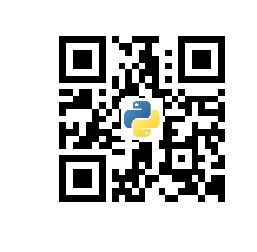

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
import qrcode
# 实例化二维码生成类
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
# 设置二维码数据
data = "http://www.vvboard.com.cn"
qr.add_data(data)

# 启用二维码颜色设置
qr.make(fit=True)
img = qr.make_image()
img = img.convert("RGBA")

icon = Image.open("logo.png")
img_w, img_h = img.size
factor = 4
size_w = int(img_w / factor)
size_h = int(img_h / factor)

icon_w, icon_h = icon.size
if icon_w > size_w:
    icon_w = size_w
if icon_h > size_h:
    icon_h = size_h
icon = icon.resize((icon_w, icon_h), Image.ANTIALIAS)

w = int((img_w - icon_w)/2)
h = int((img_h - icon_h)/2)
icon = icon.convert("RGBA")
img.paste(icon, (w, h), icon)

# 显示二维码
# img.show()
plt.imshow(img)
plt.axis('off') #不显示坐标
plt.show()

参考链接：

官方说明：https://github.com/lincolnloop/python-qrcode#advanced-usage）

Python3实现生成和识别二维码：https://www.jianshu.com/p/dda608dbaca5

# 案例：把我想说的话变成二维码保存

有时候我们想把自己说的话记录下来，可是语音又不方便以后查找，于是我们可以把它制作成二维码保存呀！

所需的器材：虚谷板、USB转3.5mm耳机声卡、带麦克风的耳机。

首先安装所需要的的库：pyaudio。运行以下代码安装：

In [ ]:
!pip3 install pyaudio

运行以下代码录制语音：

In [ ]:
import pyaudio
import wave
import os
import sys

CHUNK = 512
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000                           # 采样频率
RECORD_SECONDS = 10                    # 录制时长
WAVE_OUTPUT_FILENAME = "output.wav"    # 生成文件名

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("recording...")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("done")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

运行以下代码，来听一听效果吧：

In [ ]:
import IPython
IPython.display.Audio('output.wav')

接下来用百度语音识别将音频识别为文字。运行以下代码：

In [ ]:
from aip import AipSpeech
import json

""" 你的 APPID AK SK """
APP_ID = '18288275'
API_KEY = 'WcNHY3MpzkH6FF65zKpapY5E'
SECRET_KEY = 'Ef5xw4GfG8G3tmmaGGDSi3udw2LbrqDH'

client = AipSpeech(APP_ID, API_KEY, SECRET_KEY)

# 读取文件
def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()

# 识别本地文件
result = client.asr(get_file_content('output.wav'), 'wav', 16000, {
    'dev_pid': 1537,                                                    # 1537为中文，1737为英文
})                                                                      # 更多请参见https://ai.baidu.com/ai-doc/SPEECH/Dk4o0bmkl
json_str = json.dumps(result,ensure_ascii=False)
print(json_str)
char = result['result'][0]
print('识别结果为：',end='')
print(char)

将文字转为二维码，运行以下代码：

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import qrcode
data=char
img = qrcode.make(data)
plt.imshow(img)
plt.axis('off') #不显示坐标
plt.show()

扫描二维码看看效果吧！

类似的，我们平时收到的微信语音也可以这样转换。

你还有什么更好的创意？快动手试一试吧！